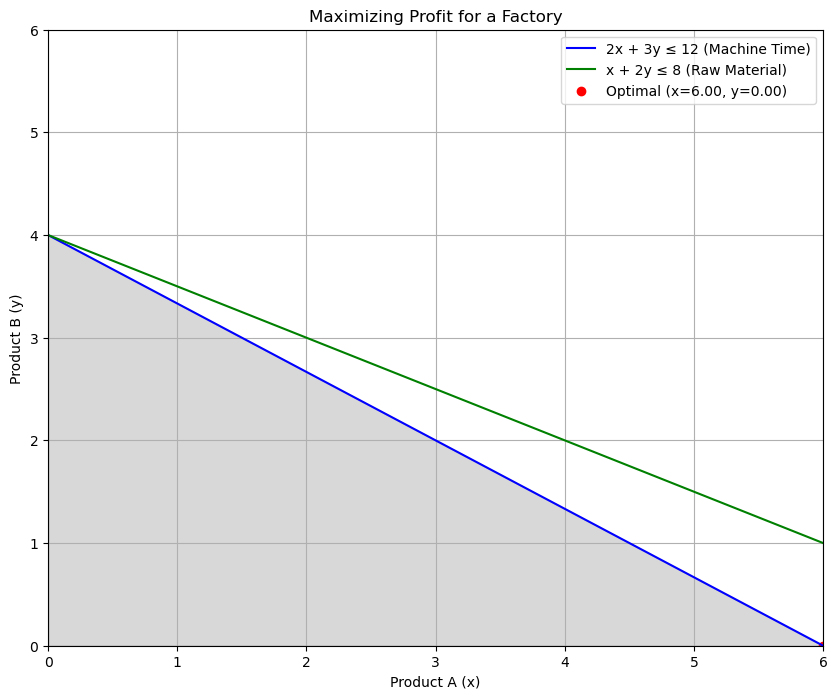

Optimal Product A Units (x): 6.00
Optimal Product B Units (y): 0.00
Maximum Profit: N18.00


In [40]:
# Maximizing Profit for a Factory

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog

# Objective function 
c = [-3, -4] 

# Constraints
A = [
    [2, 3],   # Machine time constraint
    [1, 2]    # Raw material constraint
]
b = [12, 8]  # Available resources

# Bounds
x_bounds = (0, None)
y_bounds = (0, None)

# Solve the linear program
result = linprog(c, A_ub=A, b_ub=b, bounds=[x_bounds, y_bounds], method='highs')

x_opt, y_opt = result.x
max_profit = -result.fun

x = np.linspace(0, 6, 400)
y1 = (12 - 2 * x) / 3  # Machine time
y2 = (8 - x) / 2       # Raw material

plt.figure(figsize=(10, 8))
plt.plot(x, y1, label="2x + 3y ≤ 12 (Machine Time)", color="blue")
plt.plot(x, y2, label="x + 2y ≤ 8 (Raw Material)", color="green")

y_min = np.minimum(y1, y2)
plt.fill_between(x, y_min, 0, where=(y_min >= 0), color="gray", alpha=0.3)

plt.scatter(x_opt, y_opt, color="red", label=f"Optimal (x={x_opt:.2f}, y={y_opt:.2f})")

plt.xlim(0, 6)
plt.ylim(0, 6)
plt.xlabel("Product A (x)")
plt.ylabel("Product B (y)")
plt.title("Maximizing Profit for a Factory")
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5)
plt.legend()
plt.grid()
plt.show()

print(f"Optimal Product A Units (x): {x_opt:.2f}")
print(f"Optimal Product B Units (y): {y_opt:.2f}")
print(f"Maximum Profit: N{max_profit:.2f}")


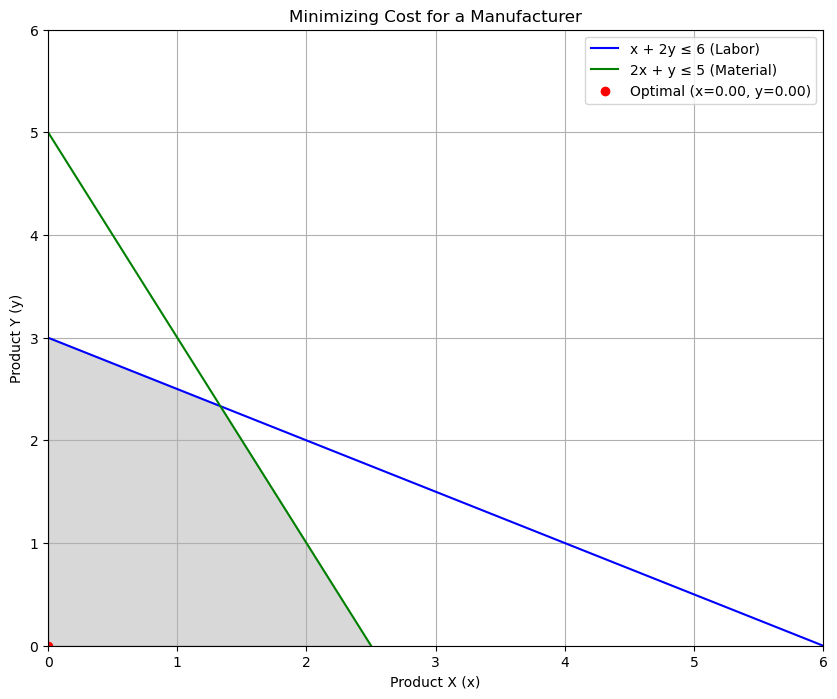

Optimal Product X Units (x): 0.00
Optimal Product Y Units (y): 0.00
Minimum Cost: N0.00


In [42]:
# Minimizing Cost for a Manufacturer

# Objective function 
c = [2, 5]  # Costs of products X and Y

# Constraints
A = [
    [1, 2],   # Labor constraint
    [2, 1]    # Material constraint
]
b = [6, 5]  # Available resources

# Bounds
x_bounds = (0, None)
y_bounds = (0, None)

result = linprog(c, A_ub=A, b_ub=b, bounds=[x_bounds, y_bounds], method='highs')

x_opt, y_opt = result.x
min_cost = result.fun

x = np.linspace(0, 6, 400)
y1 = (6 - x) / 2  # Labor
y2 = (5 - 2 * x)  # Material

plt.figure(figsize=(10, 8))
plt.plot(x, y1, label="x + 2y ≤ 6 (Labor)", color="blue")
plt.plot(x, y2, label="2x + y ≤ 5 (Material)", color="green")

y_min = np.minimum(y1, y2)
plt.fill_between(x, y_min, 0, where=(y_min >= 0), color="gray", alpha=0.3)

plt.scatter(x_opt, y_opt, color="red", label=f"Optimal (x={x_opt:.2f}, y={y_opt:.2f})")

plt.xlim(0, 6)
plt.ylim(0, 6)
plt.xlabel("Product X (x)")
plt.ylabel("Product Y (y)")
plt.title("Minimizing Cost for a Manufacturer")
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5)
plt.legend()
plt.grid()
plt.show()

print(f"Optimal Product X Units (x): {x_opt:.2f}")
print(f"Optimal Product Y Units (y): {y_opt:.2f}")
print(f"Minimum Cost: N{min_cost:.2f}")


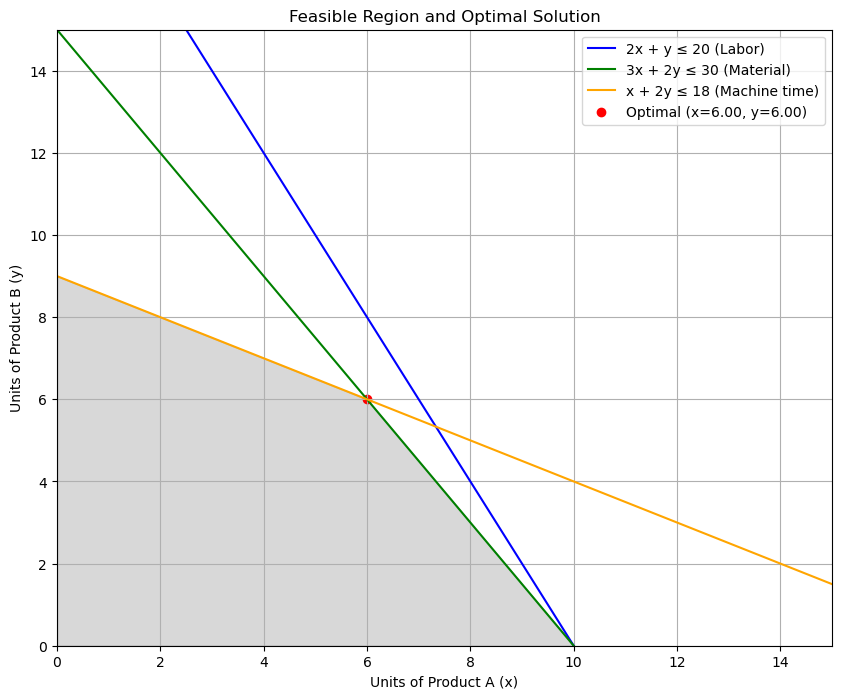

Optimal number of units of Product A (x): 6.00
Optimal number of units of Product B (y): 6.00
Maximum Profit: 54.00


In [26]:
# Maximizing Production with Multiple Resources

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog

# Objective function
c = [-5, -4] 

# Inequality constraints (Ax <= b)
A = [
    [2, 1],  # Labor constraint
    [3, 2],  # Material constraint
    [1, 2]   # Machine time constraint
]
b = [20, 30, 18]  # Available resources

# Bounds
x_bounds = (0, None)
y_bounds = (0, None)

result = linprog(c, A_ub=A, b_ub=b, bounds=[x_bounds, y_bounds], method='highs')
x_opt, y_opt = result.x
max_profit = -result.fun

x = np.linspace(0, 20, 400)
y1 = (20 - 2 * x)  # From 2x + y <= 20
y2 = (30 - 3 * x) / 2  # From 3x + 2y <= 30
y3 = (18 - x) / 2  # From x + 2y <= 18

y_min = np.minimum.reduce([y1, y2, y3])

plt.figure(figsize=(10, 8))
plt.plot(x, y1, label="2x + y ≤ 20 (Labor)", color="blue")
plt.plot(x, y2, label="3x + 2y ≤ 30 (Material)", color="green")
plt.plot(x, y3, label="x + 2y ≤ 18 (Machine time)", color="orange")

plt.fill_between(x, y_min, 0, where=(y_min >= 0), color="gray", alpha=0.3)

plt.scatter(x_opt, y_opt, color="red", label=f"Optimal (x={x_opt:.2f}, y={y_opt:.2f})")

plt.xlim(0, 15)
plt.ylim(0, 15)
plt.xlabel("Units of Product A (x)")
plt.ylabel("Units of Product B (y)")
plt.title("Feasible Region and Optimal Solution")
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5)
plt.legend()
plt.grid()
plt.show()

print(f"Optimal number of units of Product A (x): {x_opt:.2f}")
print(f"Optimal number of units of Product B (y): {y_opt:.2f}")
print(f"Maximum Profit: {max_profit:.2f}")


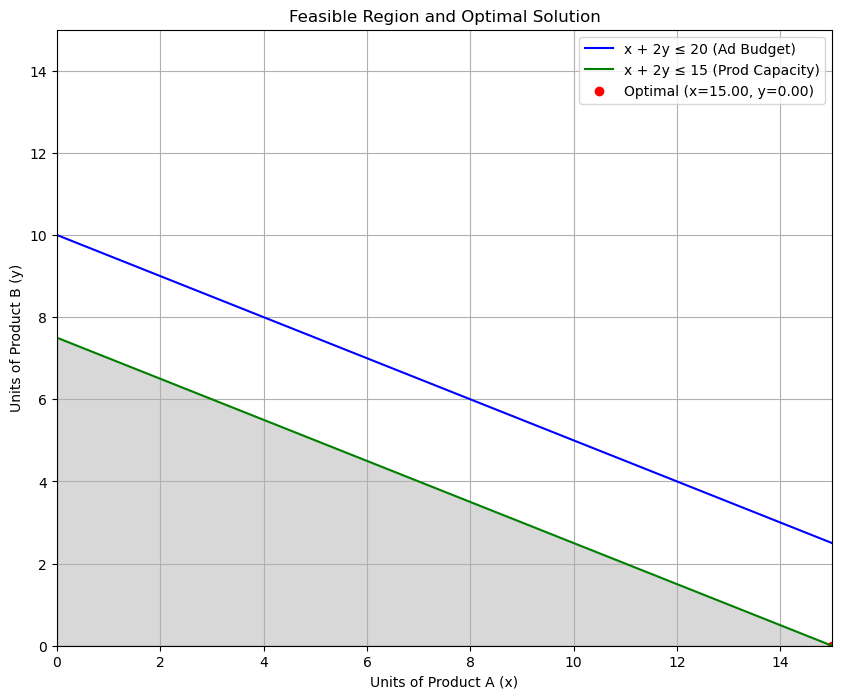

Optimal Units of Product A (x): 15.00
Optimal Units of Product B (y): 0.00
Maximum Revenue: 60.00


In [28]:
# Maximizing Revenue from Sales

# Objective function
c = [-4, -5]  

# Inequality constraints (Ax <= b)
A = [
    [1, 2],  # Advertising constraint
    [1, 2]   # Production capacity constraint
]
b = [20, 15]

# Bounds
x_bounds = (0, None)
y_bounds = (0, None)

result = linprog(c, A_ub=A, b_ub=b, bounds=[x_bounds, y_bounds], method='highs')
x_opt, y_opt = result.x
max_revenue = -result.fun

x = np.linspace(0, 20, 400)
y1 = (20 - x) / 2  # From x + 2y <= 20
y2 = (15 - x) / 2  # From x + 2y <= 15

y_min = np.minimum(y1, y2)

plt.figure(figsize=(10, 8))
plt.plot(x, y1, label="x + 2y ≤ 20 (Ad Budget)", color="blue")
plt.plot(x, y2, label="x + 2y ≤ 15 (Prod Capacity)", color="green")

plt.fill_between(x, y_min, 0, where=(y_min >= 0), color="gray", alpha=0.3)

plt.scatter(x_opt, y_opt, color="red", label=f"Optimal (x={x_opt:.2f}, y={y_opt:.2f})")

plt.xlim(0, 15)
plt.ylim(0, 15)
plt.xlabel("Units of Product A (x)")
plt.ylabel("Units of Product B (y)")
plt.title("Feasible Region and Optimal Solution")
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5)
plt.legend()
plt.grid()
plt.show()

print(f"Optimal Units of Product A (x): {x_opt:.2f}")
print(f"Optimal Units of Product B (y): {y_opt:.2f}")
print(f"Maximum Revenue: {max_revenue:.2f}")


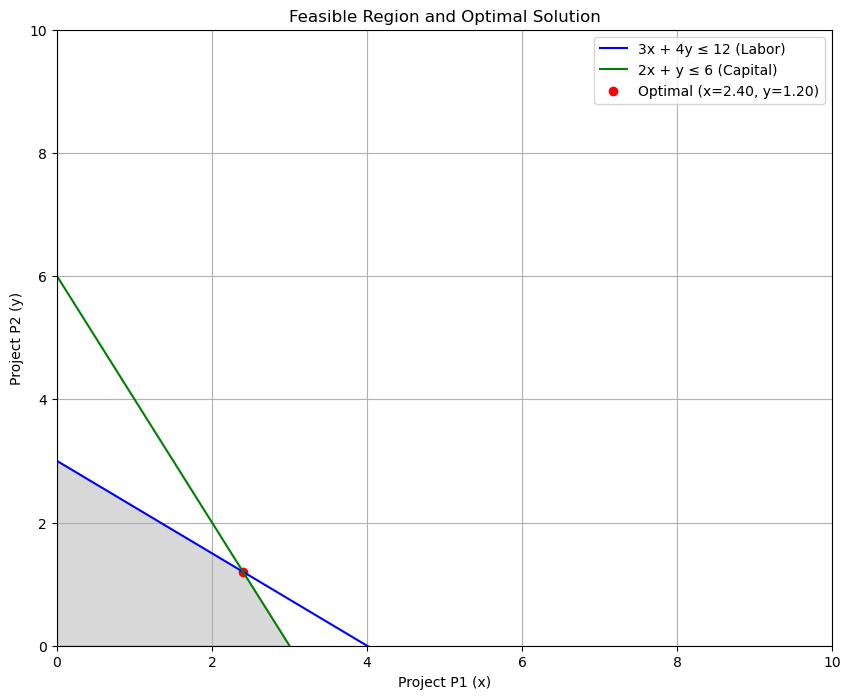

Optimal Units of P1 (x): 2.40
Optimal Units of P2 (y): 1.20
Maximum Profit: 27.60


In [30]:
# Resource Allocation for Two Projects

# Objective function
c = [-8, -7]

# Inequality constraints
A = [
    [3, 4],  # Labor hours
    [2, 1]   # Capital
]
b = [12, 6]

# Bounds
x_bounds = (0, None)
y_bounds = (0, None)

result = linprog(c, A_ub=A, b_ub=b, bounds=[x_bounds, y_bounds], method='highs')
x_opt, y_opt = result.x
max_profit = -result.fun

x = np.linspace(0, 10, 400)
y1 = (12 - 3 * x) / 4  # From 3x + 4y <= 12
y2 = (6 - 2 * x)  # From 2x + y <= 6

y_min = np.minimum(y1, y2)

plt.figure(figsize=(10, 8))
plt.plot(x, y1, label="3x + 4y ≤ 12 (Labor)", color="blue")
plt.plot(x, y2, label="2x + y ≤ 6 (Capital)", color="green")
plt.fill_between(x, y_min, 0, where=(y_min >= 0), color="gray", alpha=0.3)
plt.scatter(x_opt, y_opt, color="red", label=f"Optimal (x={x_opt:.2f}, y={y_opt:.2f})")

plt.xlim(0, 10)
plt.ylim(0, 10)
plt.xlabel("Project P1 (x)")
plt.ylabel("Project P2 (y)")
plt.title("Feasible Region and Optimal Solution")
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5)
plt.legend()
plt.grid()
plt.show()

print(f"Optimal Units of P1 (x): {x_opt:.2f}")
print(f"Optimal Units of P2 (y): {y_opt:.2f}")
print(f"Maximum Profit: {max_profit:.2f}")


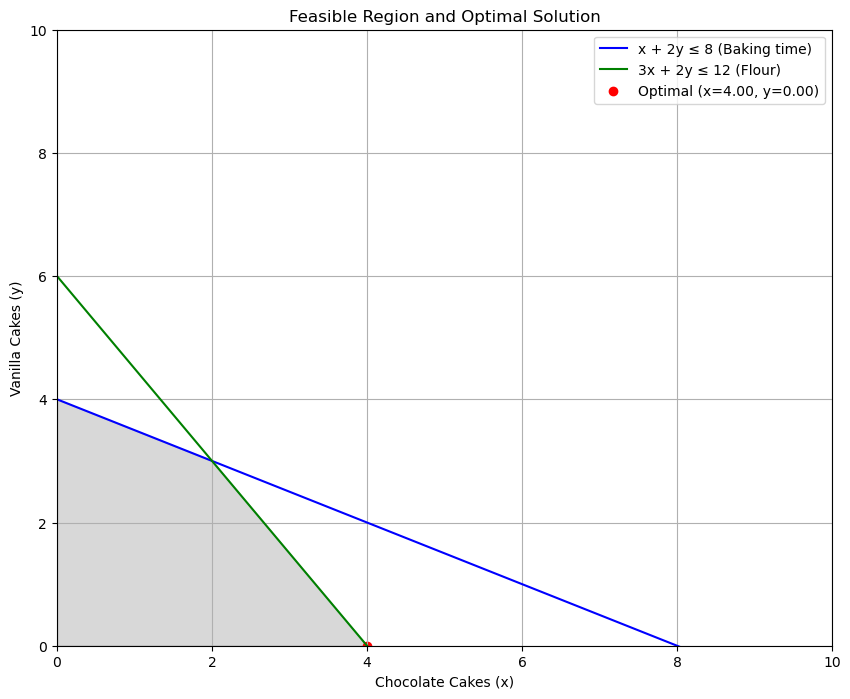

Optimal Chocolate Cakes (x): 4.00
Optimal Vanilla Cakes (y): 0.00
Maximum Profit: 20.00


In [32]:
# Production Planning for a Bakery

# Objective function
c = [-5, -3]

# Inequality constraints
A = [
    [1, 2],  # Baking time
    [3, 2]   # Flour
]
b = [8, 12]

# Bounds
x_bounds = (0, None)
y_bounds = (0, None)

result = linprog(c, A_ub=A, b_ub=b, bounds=[x_bounds, y_bounds], method='highs')
x_opt, y_opt = result.x
max_profit = -result.fun

x = np.linspace(0, 10, 400)
y1 = (8 - x) / 2  # From x + 2y <= 8
y2 = (12 - 3 * x) / 2  # From 3x + 2y <= 12

y_min = np.minimum(y1, y2)

plt.figure(figsize=(10, 8))
plt.plot(x, y1, label="x + 2y ≤ 8 (Baking time)", color="blue")
plt.plot(x, y2, label="3x + 2y ≤ 12 (Flour)", color="green")
plt.fill_between(x, y_min, 0, where=(y_min >= 0), color="gray", alpha=0.3)
plt.scatter(x_opt, y_opt, color="red", label=f"Optimal (x={x_opt:.2f}, y={y_opt:.2f})")

plt.xlim(0, 10)
plt.ylim(0, 10)
plt.xlabel("Chocolate Cakes (x)")
plt.ylabel("Vanilla Cakes (y)")
plt.title("Feasible Region and Optimal Solution")
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5)
plt.legend()
plt.grid()
plt.show()

print(f"Optimal Chocolate Cakes (x): {x_opt:.2f}")
print(f"Optimal Vanilla Cakes (y): {y_opt:.2f}")
print(f"Maximum Profit: {max_profit:.2f}")


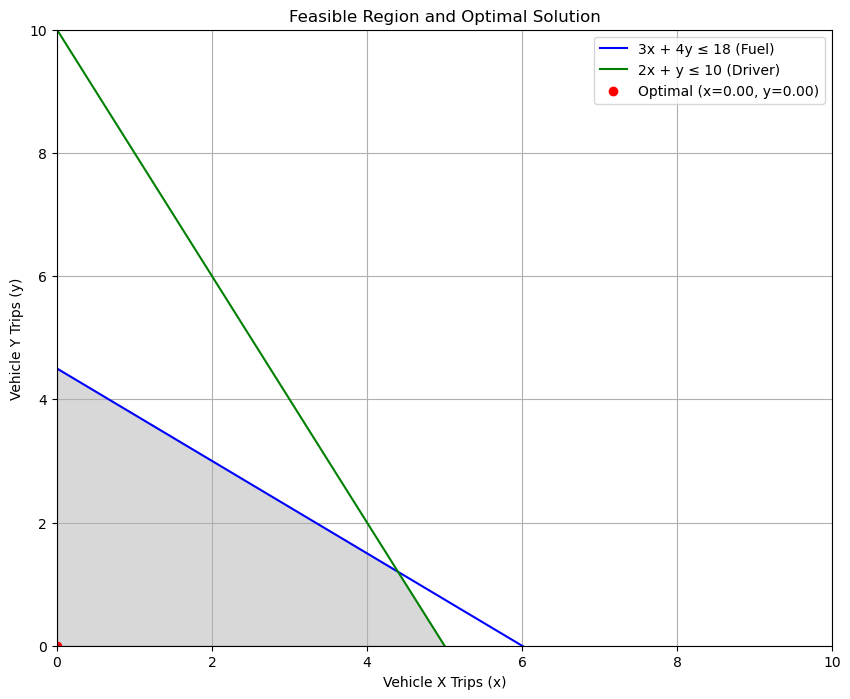

Optimal Trips for Vehicle X (x): 0.00
Optimal Trips for Vehicle Y (y): 0.00
Minimum Cost: 0.00


In [34]:
# Minimizing Cost for a Transport Company

# Objective function
c = [6, 7]  # Positive for minimization

# Inequality constraints
A = [
    [3, 4],  # Fuel hours
    [2, 1]   # Driver hours
]
b = [18, 10]

# Bounds
x_bounds = (0, None)
y_bounds = (0, None)

result = linprog(c, A_ub=A, b_ub=b, bounds=[x_bounds, y_bounds], method='highs')
x_opt, y_opt = result.x
min_cost = result.fun

x = np.linspace(0, 10, 400)
y1 = (18 - 3 * x) / 4 
y2 = (10 - 2 * x)  

y_min = np.minimum(y1, y2)

plt.figure(figsize=(10, 8))
plt.plot(x, y1, label="3x + 4y ≤ 18 (Fuel)", color="blue")
plt.plot(x, y2, label="2x + y ≤ 10 (Driver)", color="green")
plt.fill_between(x, y_min, 0, where=(y_min >= 0), color="gray", alpha=0.3)
plt.scatter(x_opt, y_opt, color="red", label=f"Optimal (x={x_opt:.2f}, y={y_opt:.2f})")

plt.xlim(0, 10)
plt.ylim(0, 10)
plt.xlabel("Vehicle X Trips (x)")
plt.ylabel("Vehicle Y Trips (y)")
plt.title("Feasible Region and Optimal Solution")
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5)
plt.legend()
plt.grid()
plt.show()

# Display results
print(f"Optimal Trips for Vehicle X (x): {x_opt:.2f}")
print(f"Optimal Trips for Vehicle Y (y): {y_opt:.2f}")
print(f"Minimum Cost: {min_cost:.2f}")


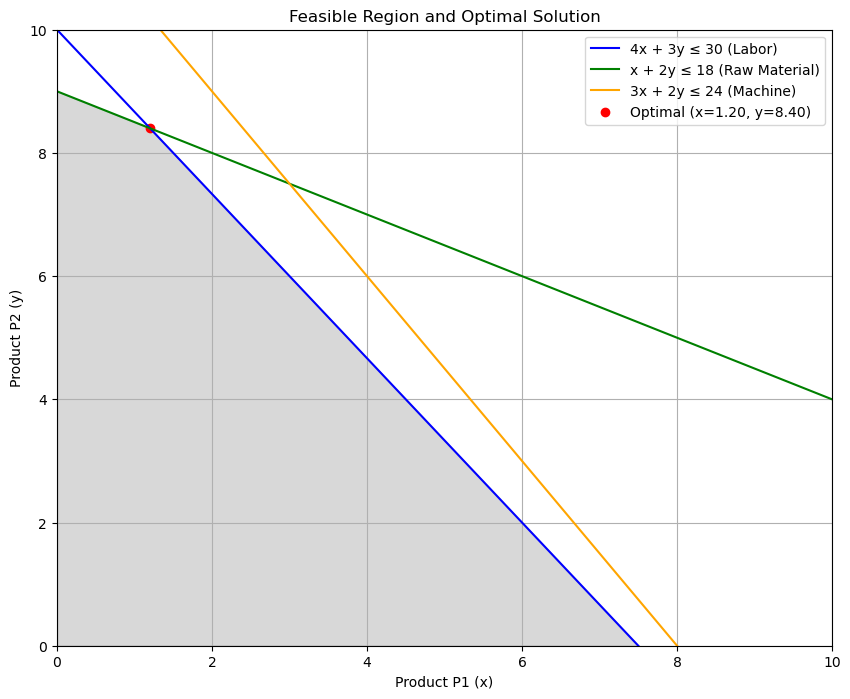

Optimal Units of Product P1 (x): 1.20
Optimal Units of Product P2 (y): 8.40
Maximum Revenue: 112.80


In [17]:
# Maximizing Revenue from Two Products

# Objective function
c = [-10, -12]

# Inequality constraints
A = [
    [4, 3],  # Labor
    [1, 2],  # Raw material
    [3, 2]   # Machine time
]
b = [30, 18, 24]

# Bounds
x_bounds = (0, None)
y_bounds = (0, None)

result = linprog(c, A_ub=A, b_ub=b, bounds=[x_bounds, y_bounds], method='highs')
x_opt, y_opt = result.x
max_revenue = -result.fun

x = np.linspace(0, 10, 400)
y1 = (30 - 4 * x) / 3  
y2 = (18 - x) / 2  
y3 = (24 - 3 * x) / 2  

y_min = np.minimum.reduce([y1, y2, y3])

plt.figure(figsize=(10, 8))
plt.plot(x, y1, label="4x + 3y ≤ 30 (Labor)", color="blue")
plt.plot(x, y2, label="x + 2y ≤ 18 (Raw Material)", color="green")
plt.plot(x, y3, label="3x + 2y ≤ 24 (Machine)", color="orange")
plt.fill_between(x, y_min, 0, where=(y_min >= 0), color="gray", alpha=0.3)
plt.scatter(x_opt, y_opt, color="red", label=f"Optimal (x={x_opt:.2f}, y={y_opt:.2f})")

plt.xlim(0, 10)
plt.ylim(0, 10)
plt.xlabel("Product P1 (x)")
plt.ylabel("Product P2 (y)")
plt.title("Feasible Region and Optimal Solution")
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5)
plt.legend()
plt.grid()
plt.show()

print(f"Optimal Units of Product P1 (x): {x_opt:.2f}")
print(f"Optimal Units of Product P2 (y): {y_opt:.2f}")
print(f"Maximum Revenue: {max_revenue:.2f}")


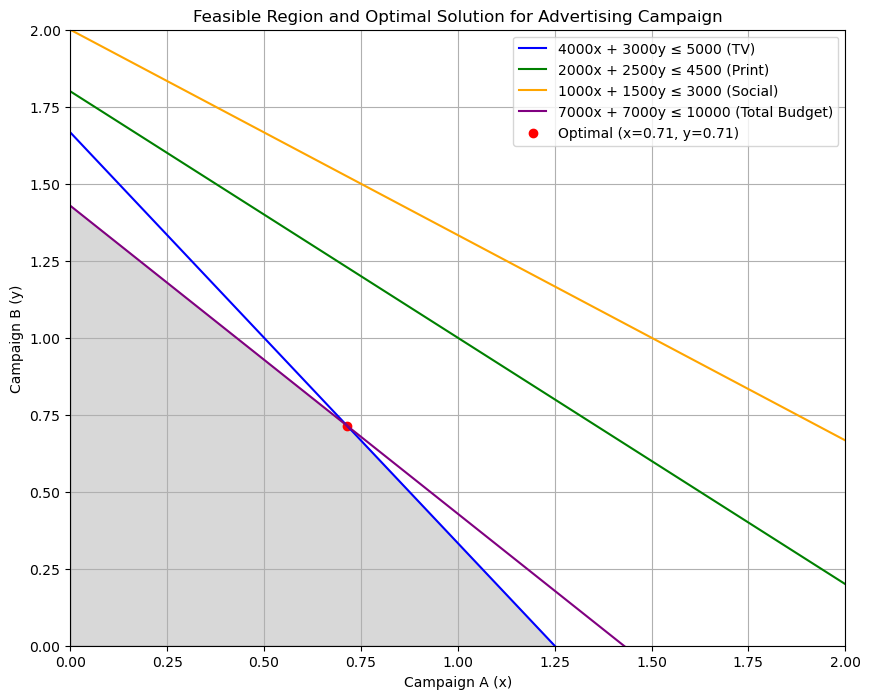

Optimal Campaign A Units (x): 0.71
Optimal Campaign B Units (y): 0.71
Maximum Reach: 642.86


In [36]:
# Advertising Campaign Budget Allocation

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog

# Objective function
c = [-500, -400]  

# Constraints
A = [
    [4000, 3000],  # Television budget constraint
    [2000, 2500],  # Print media budget constraint
    [1000, 1500],  # Social media budget constraint
    [7000, 7000]   # Total budget constraint
]
b = [5000, 4500, 3000, 10000]  # Limits for each constraint

# Bounds
x_bounds = (0, None)
y_bounds = (0, None)

result = linprog(c, A_ub=A, b_ub=b, bounds=[x_bounds, y_bounds], method='highs')

x_opt, y_opt = result.x
max_reach = -result.fun

x = np.linspace(0, 2, 400)
y1 = (5000 - 4000 * x) / 3000  
y2 = (4500 - 2000 * x) / 2500  
y3 = (3000 - 1000 * x) / 1500  
y4 = (10000 - 7000 * x) / 7000  

y_min = np.minimum.reduce([y1, y2, y3, y4])

plt.figure(figsize=(10, 8))
plt.plot(x, y1, label="4000x + 3000y ≤ 5000 (TV)", color="blue")
plt.plot(x, y2, label="2000x + 2500y ≤ 4500 (Print)", color="green")
plt.plot(x, y3, label="1000x + 1500y ≤ 3000 (Social)", color="orange")
plt.plot(x, y4, label="7000x + 7000y ≤ 10000 (Total Budget)", color="purple")
plt.fill_between(x, y_min, 0, where=(y_min >= 0), color="gray", alpha=0.3)
plt.scatter(x_opt, y_opt, color="red", label=f"Optimal (x={x_opt:.2f}, y={y_opt:.2f})")

plt.xlim(0, 2)
plt.ylim(0, 2)
plt.xlabel("Campaign A (x)")
plt.ylabel("Campaign B (y)")
plt.title("Feasible Region and Optimal Solution for Advertising Campaign")
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5)
plt.legend()
plt.grid()
plt.show()

print(f"Optimal Campaign A Units (x): {x_opt:.2f}")
print(f"Optimal Campaign B Units (y): {y_opt:.2f}")
print(f"Maximum Reach: {max_reach:.2f}")


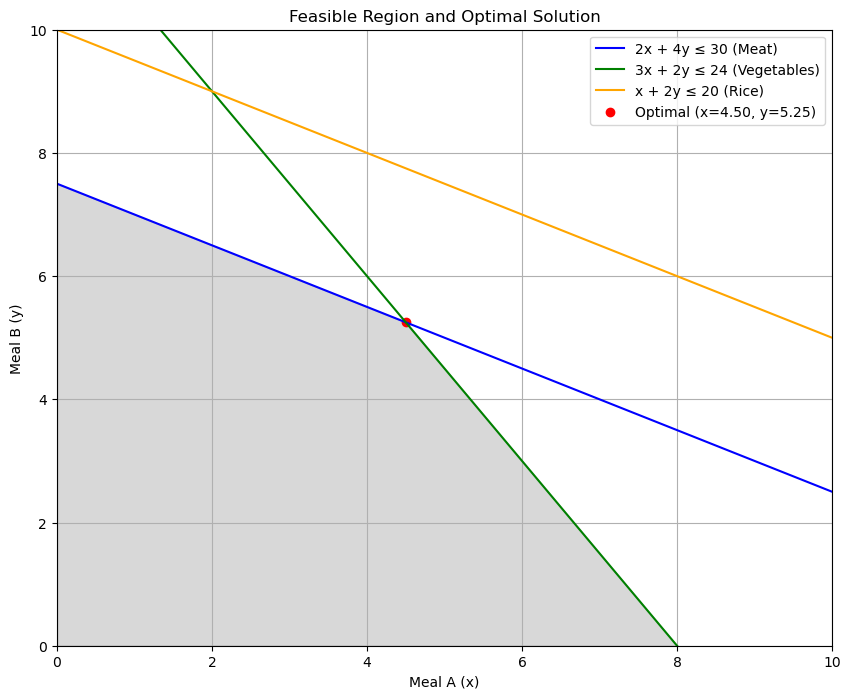

Optimal Meal A Units (x): 4.50
Optimal Meal B Units (y): 5.25
Maximum Revenue: 53.25


In [38]:
#  Meal Planning for a School Cafeteria

# Objective function
c = [-6, -5] 

# Inequality constraints
A = [
    [2, 4],  # Meat
    [3, 2],  # Vegetables
    [1, 2]   # Rice
]
b = [30, 24, 20]

# Bounds
x_bounds = (0, None)
y_bounds = (0, None)

result = linprog(c, A_ub=A, b_ub=b, bounds=[x_bounds, y_bounds], method='highs')
x_opt, y_opt = result.x
max_revenue = -result.fun

x = np.linspace(0, 10, 400)
y1 = (30 - 2 * x) / 4  
y2 = (24 - 3 * x) / 2  
y3 = (20 - x) / 2  

y_min = np.minimum.reduce([y1, y2, y3])

plt.figure(figsize=(10, 8))
plt.plot(x, y1, label="2x + 4y ≤ 30 (Meat)", color="blue")
plt.plot(x, y2, label="3x + 2y ≤ 24 (Vegetables)", color="green")
plt.plot(x, y3, label="x + 2y ≤ 20 (Rice)", color="orange")
plt.fill_between(x, y_min, 0, where=(y_min >= 0), color="gray", alpha=0.3)
plt.scatter(x_opt, y_opt, color="red", label=f"Optimal (x={x_opt:.2f}, y={y_opt:.2f})")

plt.xlim(0, 10)
plt.ylim(0, 10)
plt.xlabel("Meal A (x)")
plt.ylabel("Meal B (y)")
plt.title("Feasible Region and Optimal Solution")
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5)
plt.legend()
plt.grid()
plt.show()

print(f"Optimal Meal A Units (x): {x_opt:.2f}")
print(f"Optimal Meal B Units (y): {y_opt:.2f}")
print(f"Maximum Revenue: {max_revenue:.2f}")
